In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Defleksi Medan Listrik

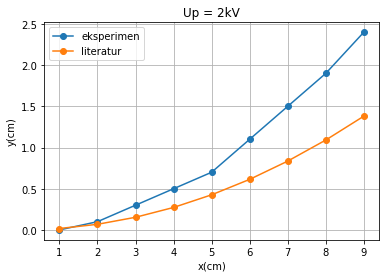

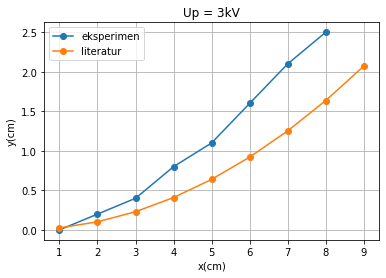

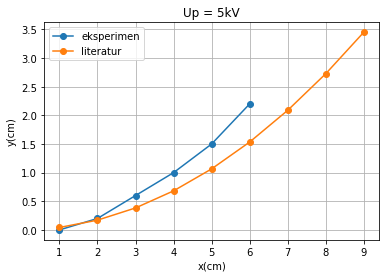

   x(cm)  y(cm) (Up = 2kV)  y(cm) (Up = 3kV)  y(cm) (Up = 5kV)  \
0      1               0.0               0.0               0.0   
1      2               0.1               0.2               0.2   
2      3               0.3               0.4               0.6   
3      4               0.5               0.8               1.0   
4      5               0.7               1.1               1.5   
5      6               1.1               1.6               2.2   
6      7               1.5               2.1               NaN   
7      8               1.9               2.5               NaN   
8      9               2.4               NaN               NaN   

   ylit(cm) (Up = 2kV)  ylit(cm) (Up = 3kV)  ylit(cm) (Up = 5kV)  
0             0.017045             0.025568             0.042614  
1             0.068182             0.102273             0.170455  
2             0.153409             0.230114             0.383523  
3             0.272727             0.409091             0.681818  
4   

In [2]:
df_lis = pd.read_csv('defleksi_medan_listrik.txt','\t')

Up = [2, 3, 5]
Ua = 4
d = 5.5

def calc_ylit(x, Up, Ua, d):
    return (0.75*Up*(x**2))/(4*Ua*d)

for iup in range(len(Up)):
    df_lis[f'ylit(cm) (Up = {Up[iup]}kV)']=df_lis.apply(
        lambda row : calc_ylit(row['x(cm)'], Up[iup], Ua, d), axis = 1)
    
    plt.plot('x(cm)', f'y(cm) (Up = {Up[iup]}kV)', data=df_lis, label = 'eksperimen', marker = 'o')
    plt.plot('x(cm)', f'ylit(cm) (Up = {Up[iup]}kV)', data=df_lis, label = 'literatur', marker = 'o')
    plt.grid()
    plt.xlabel('x(cm)')
    plt.ylabel('y(cm)')
    plt.title(f'Up = {Up[iup]}kV')
    plt.legend()
    plt.show()
    
print(df_lis)

# Defleksi Medan Magnet

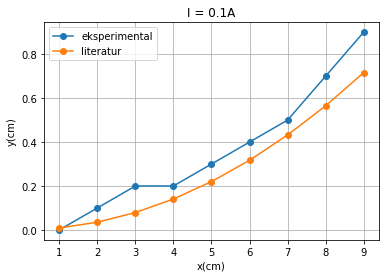

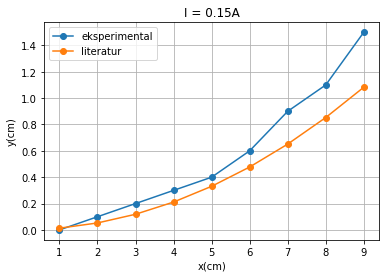

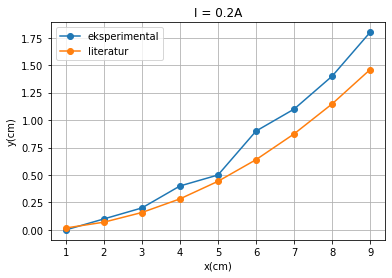

   x(cm)  y(cm) (I = 0.1A)  y(cm) (I = 0.15A)  y(cm) (I = 0.2A)  \
0      1               0.0                0.0               0.0   
1      2               0.1                0.1               0.1   
2      3               0.2                0.2               0.2   
3      4               0.2                0.3               0.4   
4      5               0.3                0.4               0.5   
5      6               0.4                0.6               0.9   
6      7               0.5                0.9               1.1   
7      8               0.7                1.1               1.4   
8      9               0.9                1.5               1.8   

   ylit(cm) (I = 0.1A)  e/m eksperimen (I = 0.1A)  \
0             0.008784               1.758819e+11   
1             0.035145               1.758819e+11   
2             0.079107               1.758819e+11   
3             0.140710               1.758819e+11   
4             0.220014               1.758819e+11   
5          

In [7]:
df_mag = pd.read_csv('defleksi_medan_magnet.txt','\t')

I = [0.1, 0.15, 0.2]
N = 500
Ua = 4000
R = 0.12
d = 5.5
e = 1.602176 * 10**-19
m = 9.109383 * 10**-31
vac_perm = 4*math.pi*(10**-7)

def calc_ylit(x, r):
    return r*100 - math.sqrt((r*100)**2 - x**2)

# Kesalahan Literatur
def lit_error(lit, exp):
    return abs((lit-exp)/lit)*100
    
emr_lit = 1.758820 * 10**11

for iI in range(len(I)):
    B = vac_perm*((4/5)**(3/2))*(N*I[iI])/R # sudah benar
    r = math.sqrt((2*m*Ua)/(e*(B**2))) 
    emr_exp = (2*Ua)/(B*r)**2 # sudah benar
    df_mag[f'ylit(cm) (I = {I[iI]}A)']=df_mag.apply(lambda row : calc_ylit(row['x(cm)'], r), axis = 1)
    
    df_mag[f'e/m eksperimen (I = {I[iI]}A)']=emr_exp
    df_mag[f'Kesalahan literatur e/m (I = {I[iI]}A)']=df_mag.apply(lambda row : lit_error(emr_lit, emr_exp), axis = 1)
    
    plt.plot('x(cm)', f'y(cm) (I = {I[iI]}A)', data=df_mag, label = 'eksperimental', marker = 'o')
    plt.plot('x(cm)', f'ylit(cm) (I = {I[iI]}A)', data=df_mag, label = 'literatur', marker = 'o')
    plt.grid()
    plt.xlabel('x(cm)')
    plt.ylabel('y(cm)')
    plt.title(f'I = {I[iI]}A')
    plt.legend()
    plt.show()
    
print(df_mag)

# Filter Wien

In [9]:
df_fwien = pd.read_csv('filter_wien.txt','\t')

d = 5.5/100
R = 0.12
N = 500
Ua = 4
vac_perm = 4*math.pi*(10**-7)

def elec_field(Up):
    return 0.75*Up/d

def mag_field(I):
    return vac_perm*((4/5)**(3/2))*(N*I)/R

def emr(Ua, Up, I):
    E = elec_field(Up)
    B = mag_field(I)
    return (1/(2*Ua))*(E/B)**2

df_fwien['E(kV/m)']=df_fwien.apply(lambda row : elec_field(row['Up(kV)']), axis = 1)
df_fwien['B(mT)']=df_fwien.apply(lambda row : mag_field(row['I(A)']*1000), axis = 1)
df_fwien['e/m eksperimen']=df_fwien.apply(lambda row : emr((row['Ua(kV)']*1000), row['Up(kV)'], row['I(A)']), axis = 1)

# Kesalahan Literatur
def lit_error(lit, exp):
    return abs((lit-exp)/lit)*100
    
emr_lit = 1.758820 * 10**11
df_fwien['Kesalahan literatur e/m']=df_fwien.apply(lambda row : lit_error(emr_lit, row['e/m eksperimen']), axis = 1)
                                          
print(df_fwien)

   Ua(kV)  Up(kV)  I(A)    E(kV/m)     B(mT)  e/m eksperimen  \
0     2.0       4  0.65  54.545455  2.435269   125418.967233   
1     3.0       4  0.77  54.545455  2.884857    59582.294548   
2     4.0       4  0.81  54.545455  3.034720    40382.193001   
3     4.9       4  0.69  54.545455  2.585132    45428.214494   

   kesalahan literatur e/m  
0                99.999929  
1                99.999966  
2                99.999977  
3                99.999974  


# Export Ke Excel

In [8]:
writer = pd.ExcelWriter('Pengolahan Data EM3 Thomson Tube.xlsx', engine='xlsxwriter')

# Tulis setiap dataframe menjadi worksheet berbeda
df_lis.to_excel(writer, sheet_name='Defleksi Medan Listrik')
df_mag.to_excel(writer, sheet_name='Defleksi Medan Magnet')
df_fwien.to_excel(writer, sheet_name='Filter Wien')

# Tutup writer Excel dari pandas dan simpan file excelnya
writer.save()